# Analisis Kinerja Siswa dan Pengembangan Program Dukungan

# **Import Library**

In [1141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score


# **Business Understanding**

**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk menganalisis kinerja siswa atau performa nya didalam kelas berdasarkan berbagai faktor seperti usia, pendidikan orang tua, kesehatan, dan hubungan antara siswa dan keluarganya. Dataset ini juga bertujuan untuk melakukan pengembangan program dukungan siswa yang mungkin memerlukan dukungan tambahan dari segi akademis maupun kesejahteraan mental serta fisiknya

**Assess Situation**

Situasi Bisnis yang dapat mendasari analisis ini adalah kinerja siswa yang berbeda beda karena beberapa siswa memilih untuk les dan sebagian lagi memilih untuk tidak, serta kesenjangan lain seperti dukungan dari keluarga, hubungan siswa dengan keluarga dan beberapa faktor lain yang menyebabkan stabil atau tidaknya kinerja seorang siswa.

**Data Mining Goals**

Tujuan dari Data Mining pada dataset ini adalah meprediksi kinerja siswa siswi di kelas berdasarkan faktor faktor yang mempengaruhi dan juga menganalisis faktor faktor yang mempengaruhi kinerja siswa, serta meningkatkan pemahaman terhadap latar belakang dari masing masing siswa.

**Project Plan**
Rencana Proyek untuk menganalisis dataset ini dimulai dengan pengumpulan data dari sumber yang tersedia. Selanjutnya, Pola pola dan karakteristiknya akan diidentifikasi. Kemudian, data tersebut akan dicari tahu apa saja korelasi antar variabel ataupun kolom kolom yang ada. Lalu, kualitas data tersebut akan dinilai dan diidentifikasi masalahnya agar bisa diatasi pada tahapan berikutnya. Semua tahap ini penting dalam menjamin berhasil atau tidaknya analisis data.

## **Data Understanding**

**Collect Initial Data**



In [1142]:
DATA_URL = '/content/Student_dataset.csv'

**Describe Data**

*Informasi Dasar*

In [1213]:
df = pd.read_csv('/content/Student_dataset.csv')

In [1144]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


1. School berisi nama sekolah
2. sex berisi gender
3. age berisi usia
4. address berisi alamat
5. famsize berisi jumlah anggota keluarga
6. Pstatus berisi status hubungan siswa dan orangtua
7. Medu berisi tingkat pendidikan ibu
8. Fedu berisi tingkat pendidikan ayah
9. Mjob berisi pekerjaan ibu
10. Fjob berisi pekerjaan ayah
11. Reason berisi alasan memilih sekolah
12. Guardian berisi wali siswa
13. travel time berisi waktu tempuh dari rumah ke sekolah
14. studytime berisi waktu belajar mingguan
15. failures berisi jumlah kegagalan kelas sebelumnya
16. schoolsup berisi dukungan pendidikan ekstra dari sekolah
17. famsup berisi dukungan pendidikan dari keluarga
18. paid berisi les privat tambahan dari pelajaran
19. activities berisi aktivitas dalam ekstrakurikuler
20. nursery berisi partisipasi dalam program prasekolah
21. higher berisi rencana untuk melanjutkan pendidikan tinggi
22. internet berisi akses internet dirumah
23. romantis berisi status hubungan romantis
24. famrel berisi kualitas hubungan keluarga
25. freetime berisi waktu luang setelah sekolah
26. goout berisi frekuensi pergi keluar bersama teman teman
27. dalc berisi konsumsi alkohol pada hari kerja
28. walc berisi konsumsi alkohol pada akhir pekan
29. health berisi kondisi kesehatan saat ini
30. absences berisi jumlah absensi siswa
31. G1 berisi berisi nilai pertama dalam skala 0-20
32. G2 berisi berisi nilai kedua dalam skala 0-20
33. G3 berisi berisi nilai akhir dalam skala 0-20

In [1214]:
df.shape

(395, 33)

Jadi Data ini mempunyai 395 Baris dan 33 Kolom

*Informasi Lanjutan*

In [1215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Kolom School
- Memiliki 395 Baris
- Bertipe data object
- Menunjukkan nama sekolah Siswa

Kolom Sex
- Memiliki 395 Baris
- Bertipe data object
- Menunjukkan Gender Siswa

Kolom Age
- Memiliki 395 Baris
- Bertipe data integer
- Menunjukkan Usia Siswa

Kolom Address
- Memiliki 395 Baris
- Bertipe data Object
- Menunjukkan Alamat Siswa

Kolom Famsize
- Memiliki 395 baris
- Bertipe data object
- Menunjukkan jumlah keluarga siswa

Kolom Pstatus (Parent's Cohabitation Status)
- Memiliki 395 baris
- Bertipe data object
- Menunjukkan status hubungan orangtua dan siswa

Kolom Medu (Mother's Education Level)
- Memiliki 395 Baris
- Bertipe data integer
- Menunjukkan tingkat pendidikan ibu

Kolom Fedu (Father's Education Level)
- Memiliki 395 Baris
- Bertipe data integer
- Menunjukkan tingkat pendidikan ayah

Kolom Mjob (Mother's Job)
- Memiliki 395 baris
- bertipe data object
- Menunjukkan Pekerjaan ibu

Kolom Fjob (Father's Job)
- Memiliki 395 baris
- bertipe data object
- Menunjukkan Pekerjaan ayah

Kolom Reason
- Memiliki 395 Baris
- bertipe data object
- menunjukkan alasan memilih sekolah tersebut

Kolom Guardian
 - Memiliki 395 baris
 - bertipe data object
 - Menunjukkan wali siswa

Kolom Traveltime
 - Memiliki 395 baris
 - bertipe data integer
 - Menunjukkan waktu tempuh dari rumah ke sekolah

Kolom Studytime
 - Memiliki 395 baris
 - Bertipe data integer
 - Menunjukkan waktu belajar mingguan

Kolom Failures
- memiliki 395 baris
- bertipe data integer
- menunjukkan jumlah kegagalan kelas sebelumnya

Kolom Schoolsup (School Support)
- memiliki 395 baris
- bertipe data object
- menunjukkan dukungan pendidikan ekstra dari sekolah

Kolom Famsup (Family Support)
- memiliki 395 baris
- bertipe data object
- menunjukkan dukungan pendidikan dari keluarga

Kolom Paid
- memiliki 395 baris
- bertipe data object
- menunjukkan les privat tambahan dalam mata pelajaran

Kolom Activities
- Memiliki 395 baris
- bertipe data object
- menunjukkan aktivitas ekstrakurikuler

Kolom Nursery
- memiliki 395 baris
- bertipe data object
- menunjukkan partisipasi dalam program prasekolah

Kolom Higher
- memiliki 395 baris
- bertipe data object
- menunjukkan rencana untuk melanjutkan pendidikan tinggi

Kolom Internet
- memiliki 395 baris
- bertipe data object
- menunjukkan akses internet di rumah

Kolom Romantic
- memiliki 395 baris
- bertipe data object
- menunjukkan status hubungan romantis

Kolom Famrel (Family Relations)
- memiliki 395 baris
- bertipe data integer
- menunjukkan kualitas hubungan keluarga

Kolom Free time
- memiliki 395 baris
- bertipe data integer
- menunjukkan waktu luang setelah sekolah

Kolom Goout
- Memiliki 395 baris
- bertipe data integer
- menunjukkan frekuensi pergi keluar bersama teman teman

Kolom Dalc (Workday alcohol consumption)
- memiliki 395 baris
- bertipe data integer
- menunjukkan konsumsi alkohol pada hari kerja

Kolom Walc (Weekend alcohol consumption)
- memiliki 395 baris
- bertipe data integer
- menunjukkan konsumsi alkohol pada akhir pekan

Kolom Health
- memiliki 395 baris
- bertipe data integer
- menunjukkan kondisi kesehatan saat ini

Kolom Absences
- memiliki 395 baris
- bertipe data integer
- menunjukkan jumlah absensi siswa

Kolom G1
- memiliki 395 baris
- bertipe data integer
- nilai pertama dalam skala 0-20

Kolom G2
- memiliki 395 baris
- bertipe data integer
- nilai kedua dalam skala 0-20

Kolom G3
- memiliki 395 baris
- bertipe data integer
- nilai akhir dalam skala 0-20







*Informasi Statistik Deskriptif*

In [1216]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


1. Kolom Age
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata umur siswa adalah 16.696203
- std (standar deviasi) : standar deviasi nya adalah 1.276043
- min (minimum) : nilai minimum dari umur siswa adalah 15
- 25% (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 16
- 50% (kuartil kedua) : Kuartil kedua dari kolom ini yaitu 17
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 18
- max (Maksimum) : nilai maksimum dari kolom ini yaitu 22



2. Kolom Medu (Mother's Education Level)
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 2.749367
- std (standar deviasi) : standar deviasi nya adalah 1.094735
- min (minimum) : nilai minimum dari kolom adalah 0.000000
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 2
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 3
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 4
- max (maximum) : nilai maksimum dari kolom ini yaitu 4


3. Kolom Fedu (Father's education level)
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 2.521519
- std (standar deviasi) : standar deviasi nya adalah 1.088201
- min (minimum) : nilai minimum dari kolom adalah 0.000000
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 2
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 2
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 3
- max (maximum) : nilai maksimum dari kolom ini yaitu 4


4. Kolom Traveltime
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 2.749367
- std (standar deviasi) : standar deviasi nya adalah 1.448101
- min (minimum) : nilai minimum dari kolom adalah 1
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 1
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 1
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 2
- max (maximum) : nilai maksimum dari kolom ini yaitu 4


5. Kolom Studytime
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 2.035443
- std (standar deviasi) : standar deviasi nya adalah 0.839240
- min (minimum) : nilai minimum dari kolom adalah 1
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 1
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 2
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 2
- max (maximum) : nilai maksimum dari kolom ini yaitu 4


6. Kolom failures
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 0.334177
- std (standar deviasi) : standar deviasi nya adalah 0.743651
- min (minimum) : nilai minimum dari kolom adalah 1
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 4
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 4
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 5
- max (maximum) : nilai maksimum dari kolom ini yaitu 5


7. Kolom Famrel
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 3.944304
- std (standar deviasi) : standar deviasi nya adalah 0.896659
- min (minimum) : nilai minimum dari kolom adalah 1
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 4
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 4
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 5
- max (maximum) : nilai maksimum dari kolom ini yaitu 5


8. Kolom Freetime
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 3.235443
- std (standar deviasi) : standar deviasi nya adalah 0.998862
- min (minimum) : nilai minimum dari kolom adalah 1
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 3
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 3
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 4
- max (maximum) : nilai maksimum dari kolom ini yaitu 5


9. Kolom goout
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 3.108861
- std (standar deviasi) : standar deviasi nya adalah 1.113278
- min (minimum) : nilai minimum dari kolom adalah 1
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 2
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 3
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 4
- max (maximum) : nilai maksimum dari kolom ini yaitu 5


10. Kolom Dalc
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 1.481013
- std (standar deviasi) : standar deviasi nya adalah 0.890741
- min (minimum) : nilai minimum dari kolom adalah 1
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 1
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 1
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 2
- max (maximum) : nilai maksimum dari kolom ini yaitu 5


11. Kolom Walc
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 2.291139
- std (standar deviasi) : standar deviasi nya adalah 1.287897
- min (minimum) : nilai minimum dari kolom adalah 1
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 1
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 2
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 3
- max (maximum) : nilai maksimum dari kolom ini yaitu 5


12. Kolom health
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 3.554430
- std (standar deviasi) : standar deviasi nya adalah 1.390303
- min (minimum) : nilai minimum dari kolom adalah 1
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 3
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 4
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 5
- max (maximum) : nilai maksimum dari kolom ini yaitu 5


13. Kolom G1
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 10.908861
- std (standar deviasi) : standar deviasi nya adalah 3.319195
- min (minimum) : nilai minimum dari kolom adalah 3
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 8
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 11
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 13
- max (maximum) : nilai maksimum dari kolom ini yaitu 19


14. Kolom G2
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 10.713924
- std (standar deviasi) : standar deviasi nya adalah 3.761505
- min (minimum) : nilai minimum dari kolom adalah 0
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 9
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 11
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 13
- max (maximum) : nilai maksimum dari kolom ini yaitu 19


15. Kolom G3
- count (jumlah) : terdapat 395 entri
- mean (rata rata) : rata rata yang diperoleh adalah 10.415190
- std (standar deviasi) : standar deviasi nya adalah 4.581443
- min (minimum) : nilai minimum dari kolom adalah 0
- 25 % (kuartil pertama) : Kuartil pertama dari kolom ini yaitu 8
- 50% (Kuartil kedua) : Kuartil kedua dari kolom ini yaitu 11
- 75% (kuartil ketiga) : Kuartil ketiga dari kolom ini yaitu 14
- max (maximum) : nilai maksimum dari kolom ini yaitu 20



**Exploratory Data Analysis**

In [1148]:
# Pilih kolom-kolom yang ingin ditampilkan
selected_columns = ['G1', 'G2', 'G3', 'studytime', 'freetime']

# Hitung korelasi antar kolom yang dipilih
selected_corr = df[selected_columns].corr()

# Korelasi Pearson dengan plotly
px.imshow(df[selected_columns].corr(), title="Korelasi Pearson antara G1, G2, G3, Studytime, dan Freetime")

G1
* Korelasi antara kolom G1 dan Freetime ada keterkaitan karena korelasi yang dihasilkan 0.012
* Korelasi antara G1 dan studytime ada keterkaitan karena korelasi yang dihasilkan 0.16
*  Korelasi antara G1 dan G3 ada keterkaitan karena korelasi yang dihasilkan 0.80
* Korelasi antara G1 dan G2 ada keterkaitan karena korelasi yang dihasilkan 0.85


G2
* Korelasi antara kolom G2 dan Freetime tidak ada keterkaitan karena korelasi yang dihasilkan -0.013
* Korelasi kolom G2 dan studytime ada keterkaitan karena korelasi yang dihasilkan 0.13
* Korelasi kolom G2 dan G3 ada keterkaitan karena korelasi yang dihasilkan 0.90
* Korelasi kolom G2 dan G1 ada keterkaitan karena korelasi yang dihasilkan 0.85

G3
* Korelasi antara kolom G3 dan freetime ada keterkaitan karena korelasi yang dihasilkan 0.011
* Korelasi antara kolom G3 dan Studytime ada keterkaitan karena korelasi yang dihasilkan 0.09
* Korelasi antara kolom G3 dan G2 ada keterkaitan karena korelasi yang dihasilkan 0.90
* Korelasi antara kolom G3 dan G1 ada keterkaitan karena korelasi yang dihasilkan 0.80

Studytime
* Korelasi antara kolom studytime dan freetime tidak ada keterkaitan karena korelasi yang dihasilkan -0.14
* Korelasi antara kolom studytime dan G3 ada keterkaitan karena korelasi yang dihasilkan 0.09
* Korelasi antara kolom studytime dan G2 ada keterkaitan karena korelasi yang dihasilkan 0.13
* Korelasi antara kolom studytime dan G1 ada keterkaitan karena korelasi yang dihasilkan 0.16

Freetime
* Korelasi antara kolom freetime dan studytime tidak ada keterkaitan karena korelasi yang dihasilkan -0.14
* Korelasi antara kolom freetime dan G3 ada keterkaitan karena korelasi yang dihasilkan 0.011
* Korelasi  freetime dan G2 tidak ada keterkaitan karena korelasi yang dihasilkan -0.013
* Korelasi antara kolom freetime dan G1 ada keterkaitan karena korelasi yang dihasilkan 0.012



**Verify Data Quality**

**Missing Values**

In [1217]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

Dapat dilihat bahwa semua kolom diatas bernilai "False", yang dimana tidak ada nilai kosong pada setiap kolom tersebut.

**Outliers Values**

In [1218]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.253165
Medu,0.000000
Fedu,0.506329
traveltime,2.025316
studytime,6.835443
failures,21.012658
famrel,6.582278
freetime,4.810127
goout,0.000000
Dalc,4.556962


1. Kolom Age terdapat 0.253165% data outlier
2. Kolom Medu tidak ada data outlier
3. Kolom Fefu terdapat 0.506329% data outlier
4. Kolom traveltime terdapat 2.025316% data outlier
5. Kolom studytime terdapat 6.835443% data outlier
6. Kolom failures terdapat 21.012658% data outlier
7. kolom famrel terdapat 6.582278% data outlier
8. kolom freetime terdapat 4.810127% data outlier
9. kolom goout tidak ada data outlier
10. kolom dalc terdapat 4.556962% data outlier
11. kolom walc tidak ada data outlier
12. kolom healht tidak ada data outlier
13. kolom absences terdapat 3.797468% data outlier
14. kolom G1 tidak ada data outlier
15. kolom G2 terdapat 3.291139% data outlier
16. kolom G3 tidak ada data outlier

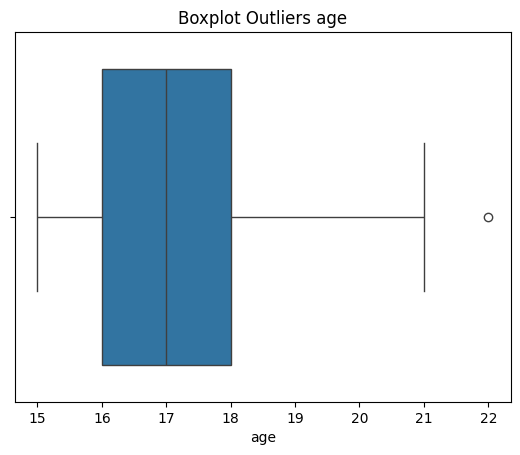

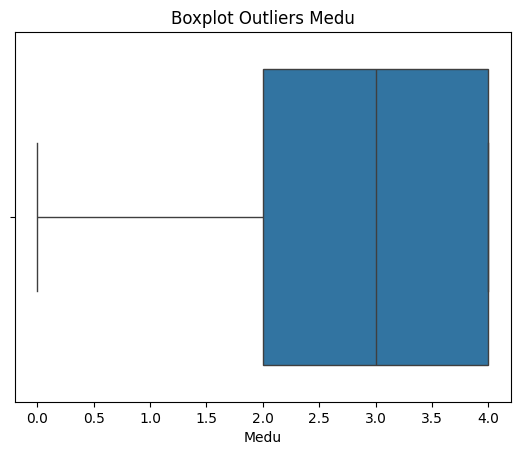

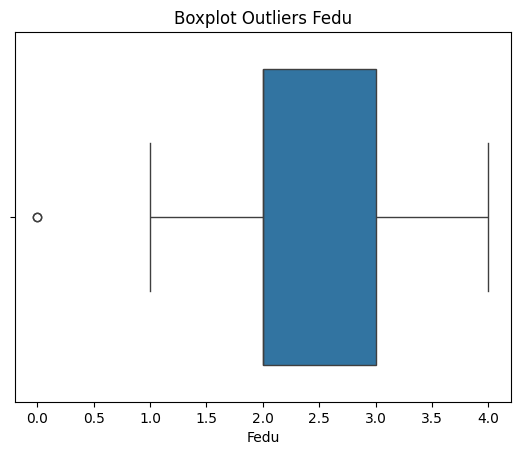

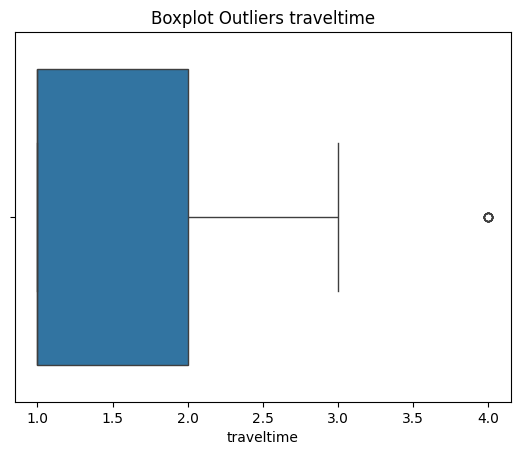

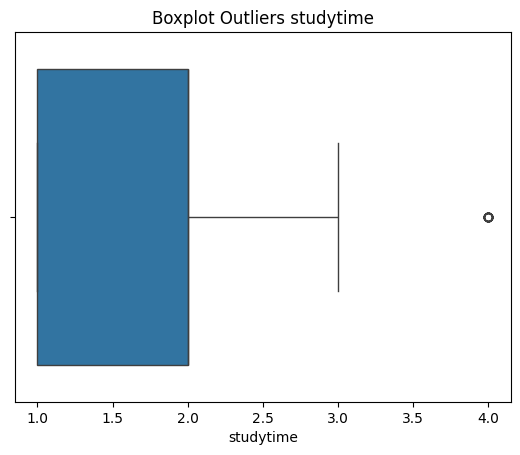

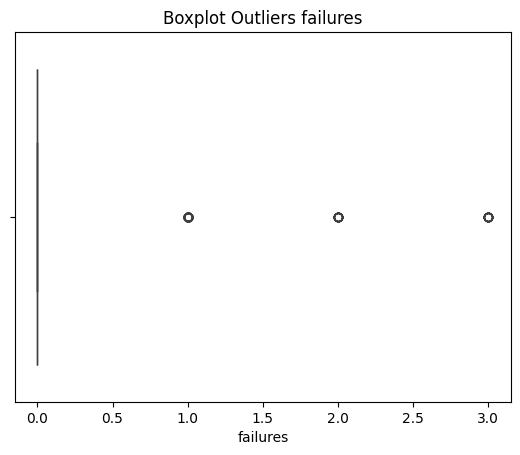

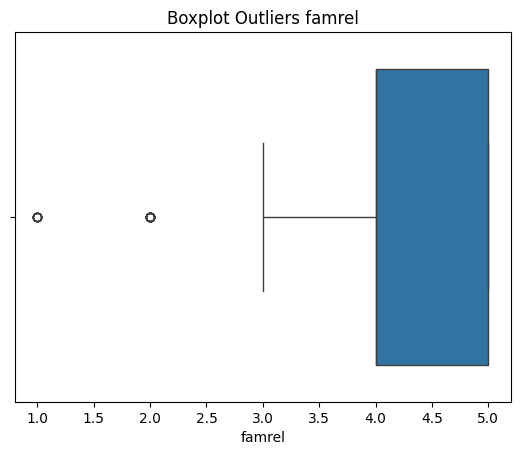

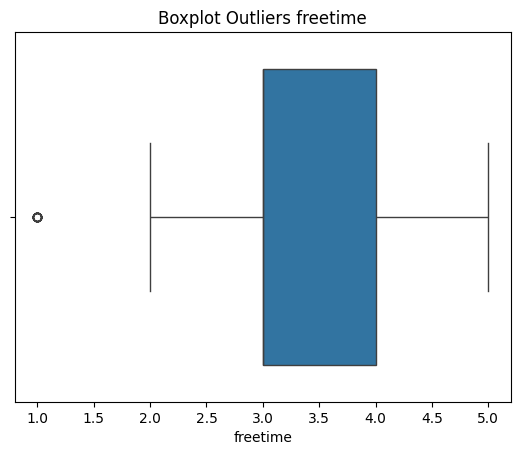

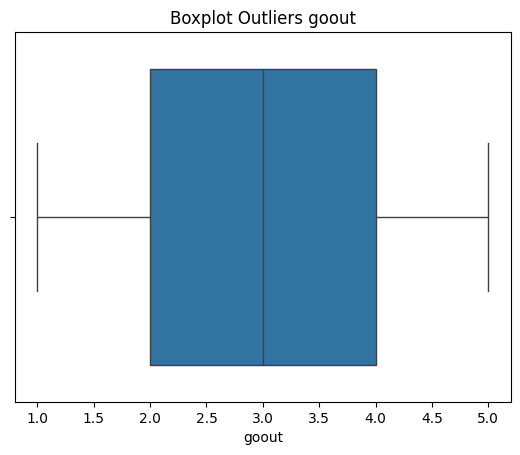

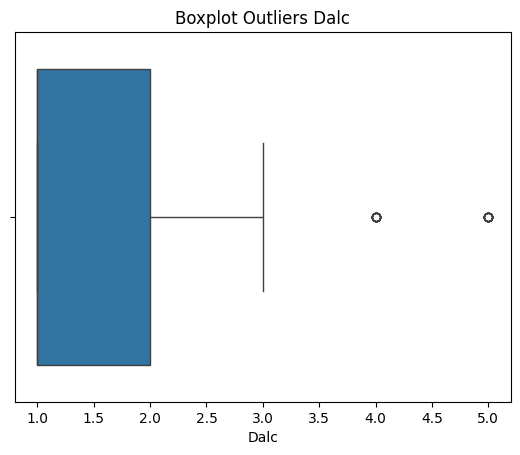

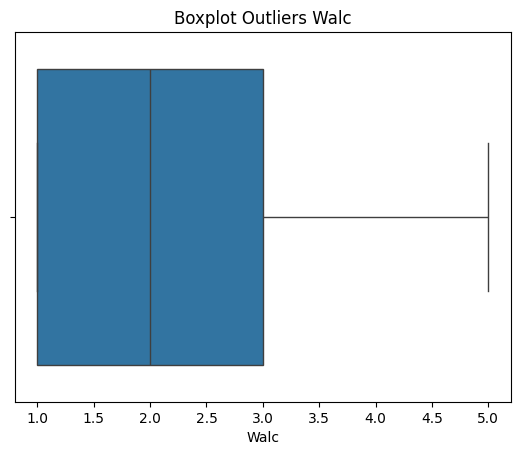

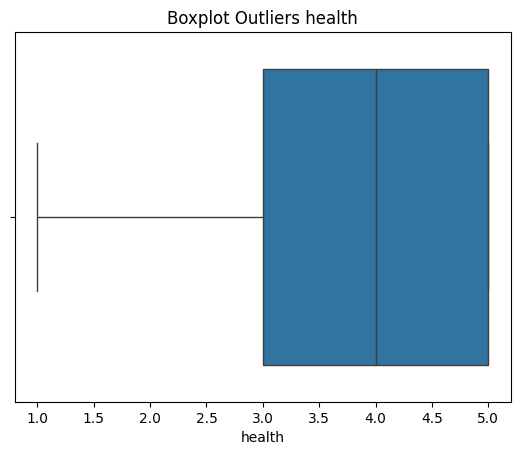

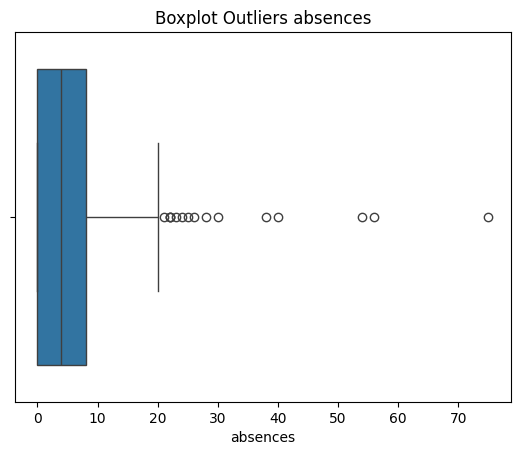

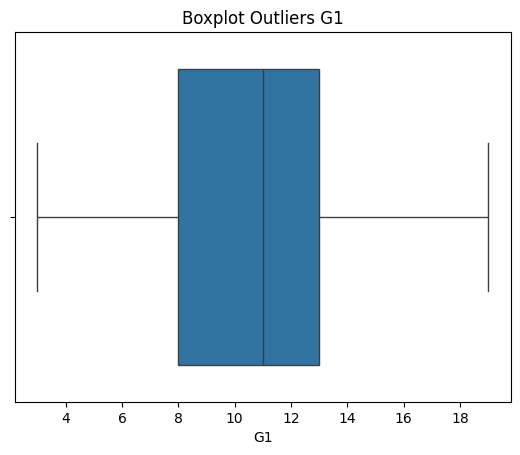

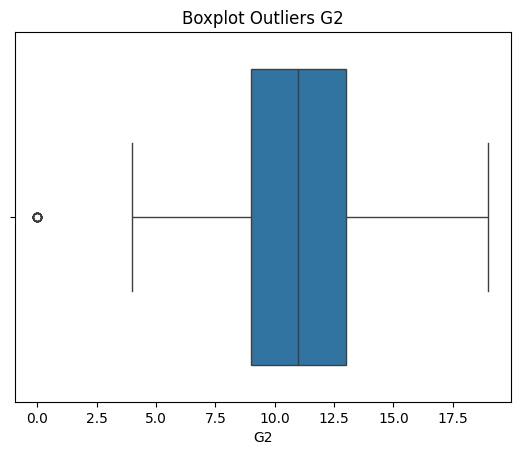

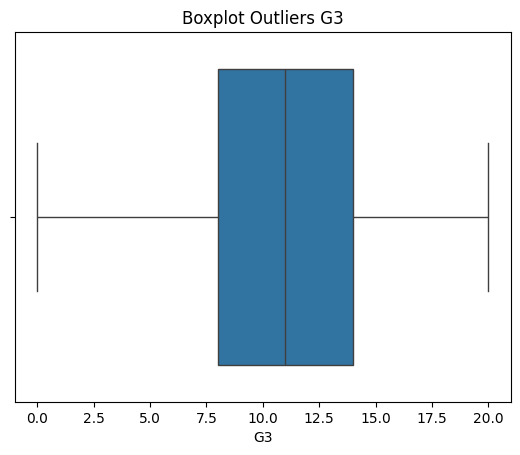

In [1219]:
columns = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures",
           "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", "G1", "G2", "G3"]

for col in columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot Outliers {col}")
    plt.show()

Dalam visualisasi boxplot terdapat titik titik yang terletak di luar garis batas whisker pada kolom age, Fedu, traveltime, studytime, failures, famrel, freetime, Dalc, absences, G2 yang berarti terdapat data data yang tidak wajar.

sedangkan pada kolom Medu, goout, Walc, health, G1, G3 tidak terdapat titik titik yang menandakan ada outliers atau tidak ada nilai yang jauh dari mayoritas data.

**Duplicated Values**

In [1220]:
df[df.duplicated]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


Dapat dilihat dari data diatas bahwa tidak ada data yang terduplikat.

**Inconsistent Values / Noise**

In [1221]:
for column in df.columns:
    if df[column].dtype != 'object':  # Mengecek hanya kolom numerik
        min_value = df[column].min()
        max_value = df[column].max()
        print(f"Rentang nilai untuk '{column}': dari {min_value} hingga {max_value}")


Rentang nilai untuk 'age': dari 15 hingga 22
Rentang nilai untuk 'Medu': dari 0 hingga 4
Rentang nilai untuk 'Fedu': dari 0 hingga 4
Rentang nilai untuk 'traveltime': dari 1 hingga 4
Rentang nilai untuk 'studytime': dari 1 hingga 4
Rentang nilai untuk 'failures': dari 0 hingga 3
Rentang nilai untuk 'famrel': dari 1 hingga 5
Rentang nilai untuk 'freetime': dari 1 hingga 5
Rentang nilai untuk 'goout': dari 1 hingga 5
Rentang nilai untuk 'Dalc': dari 1 hingga 5
Rentang nilai untuk 'Walc': dari 1 hingga 5
Rentang nilai untuk 'health': dari 1 hingga 5
Rentang nilai untuk 'absences': dari 0 hingga 75
Rentang nilai untuk 'G1': dari 3 hingga 19
Rentang nilai untuk 'G2': dari 0 hingga 19
Rentang nilai untuk 'G3': dari 0 hingga 20


1. Kolom 'Age'. Rentang nilai dari 15 hingga 22. Ini menunjukkan umur termuda adalah 15 dan umur tertua adalah 22.
2. Kolom 'Medu'. Rentang nilai dari 0 hingga 4. ini menunjukkan tingkat Medu terendah adalah 0 dan tertinggi adalah 4.
3. Kolom 'Fedu'. Rentang nilai dari 0 hingga 4. ini menunjukkan tingkat Fedu terendah adalah 0 dan tertinggi adalah 4.
4. Kolom 'traveltime'. rentang nilai dari 1 hingga 4. ini menunjukkan tingkat traveltime terendah adalah 1 dan tertinggi adalah 4.
5. Kolom 'Studytime'. rentang nilai dari 1 hingga 4. ini menunjukkan tingkat studytime terendah adalah 1 dan tertinggi adalah 4.
6. Kolom 'Failures'. rentang nilai dari 0 hingga 3. ini menunjukkan tingkat failures terendah adalah 0 dan tertinggi adalah 3.
7. Kolom 'Famrel'. rentang nilai dari 1 hingga 5. ini menunjukkan tingkat famrel terendah adalah 1 dan tertinggi adalah 5.
8. Kolom 'Freetime'. rentang nilai dari 1 hingga 5. ini menunjukkan tingkat freetime terendah adalah 1 dan tertinggi adalah 5.
9. Kolom 'goout'. rentang nilai dari 1 hingga 5. ini menunjukkan tingkat goout terendah adalah 1 dan tertinggi adalah 5.
10. Kolom 'Dalc'. rentang nilai dari 1 hingga 5. ini menunjukkan tingkat Dalc terendah adalah 1 dan tertinggi adalah 5.
11. Kolom 'Walc'. rentang nilai dari 1 hingga 5. ini menunjukkan tingkat Walc terendah adalah 1 dan tertinggi adalah 5.
12. Kolom 'Health'. rentang nilai dari 1 hingga 5. ini menunjukkan tingkat Health terendah adalah 1 dan tertinggi adalah 5.
13. Kolom 'absences'. rentang nilai dari 0 hingga 75. ini menunjukkan tingkat freetime terendah adalah 0 dan tertinggi adalah 75.
14. Kolom 'G1'. rentang nilai dari 3 hingga 19. ini menunjukkan tingkat freetime terendah adalah 3 dan tertinggi adalah 19.
15. Kolom 'G2'. rentang nilai dari 0 hingga 19. ini menunjukkan tingkat freetime terendah adalah 0 dan tertinggi adalah 19.
16. Kolom 'G3'. rentang nilai dari 0 hingga 20. ini menunjukkan tingkat freetime terendah adalah 3 dan tertinggi adalah 20.




# **Data Cleaning**

### **Penanganan Missing Values**

**Pengecekan Missing Values**

In [1222]:
print((df.isna().sum() / len(df)) * 100)

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64


Ini adalah output yang menunjukkan bahwa tidak ada nilai kosong pada setiap kolom

Tidak dilakukan Penghapusan dan Imputasi missing values karena tidak terdapat nilai kosong pada setiap kolom.

**Pengecekkan Ulang**

In [1223]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
school,0.0
sex,0.0
age,0.0
address,0.0
famsize,0.0
Pstatus,0.0
Medu,0.0
Fedu,0.0
Mjob,0.0
Fjob,0.0


### **Penanganan Duplicated Values**

**Pengecekan Nilai Duplikat**

In [1224]:
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


Output diatas menunjukkan bahwa tidak ada nilai yang terduplikat. Maka, tidak dilakukan Penghapusan nilai duplikat.

### **Penanganan Outliers**

**Pengecekkan Outliers**

In [1225]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.253165
Medu,0.000000
Fedu,0.506329
traveltime,2.025316
studytime,6.835443
failures,21.012658
famrel,6.582278
freetime,4.810127
goout,0.000000
Dalc,4.556962


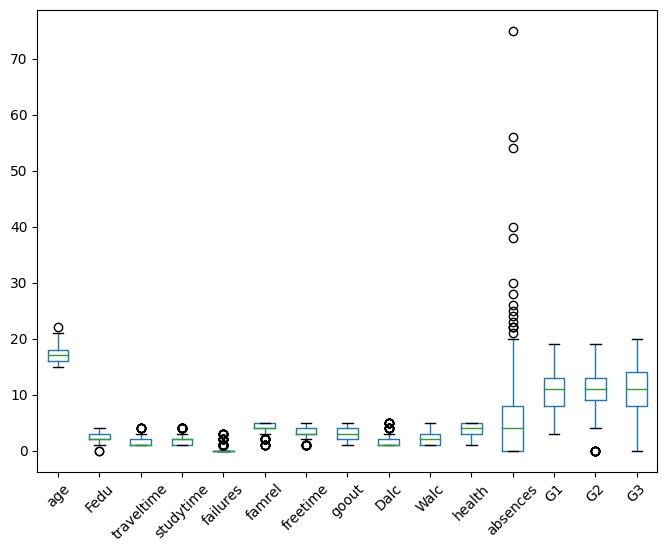

In [1226]:
boxplot = df.drop('Medu', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

**Hapus Outliers**

Melakukan penghapusan baris pada kolom "failures" untuk menangani outliers. Kolom failures dilakukan penghapusan karena kolom ini juga tidak dipakai dalam analisis ini.

In [1227]:
Q1 = df['failures'].quantile(0.25)
Q3 = df['failures'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['failures'] >= lower_bound) & (df['failures'] <= upper_bound)]

**Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "absences"

In [1228]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df.loc[df['age'] > upper_whisker, 'age'] = upper_whisker
df.loc[df['age'] < lower_whisker, 'age'] = lower_whisker

In [1229]:
Q1 = df['G2'].quantile(0.25)
Q3 = df['G2'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df.loc[df['G2'] > upper_whisker, 'G2'] = upper_whisker
df.loc[df['G2'] < lower_whisker, 'G2'] = lower_whisker

In [1230]:
Q1 = df['G3'].quantile(0.25)
Q3 = df['G3'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df.loc[df['G3'] > upper_whisker, 'G3'] = upper_whisker
df.loc[df['G3'] < lower_whisker, 'G3'] = lower_whisker

In [1231]:
Q1 = df['freetime'].quantile(0.25)
Q3 = df['freetime'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df.loc[df['freetime'] > upper_whisker, 'freetime'] = upper_whisker
df.loc[df['freetime'] < lower_whisker, 'freetime'] = lower_whisker

Dilakukan Imputasi Outliers pada kolom Age, Freetime, G2, dan G3 karena kolom kolom ini yang nantinya akan dipakai. sedangkan kolom lain yang masih ada outliers, tidak dilakukan imputasi karena kolom kolom tersebut tidak dipakai nantinya.

**Pengecekkan Ulang**

In [1232]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
age,0.000000
Medu,0.000000
Fedu,0.000000
traveltime,1.923077
studytime,0.000000
failures,0.000000
famrel,6.089744
freetime,0.000000
goout,0.000000
Dalc,4.166667


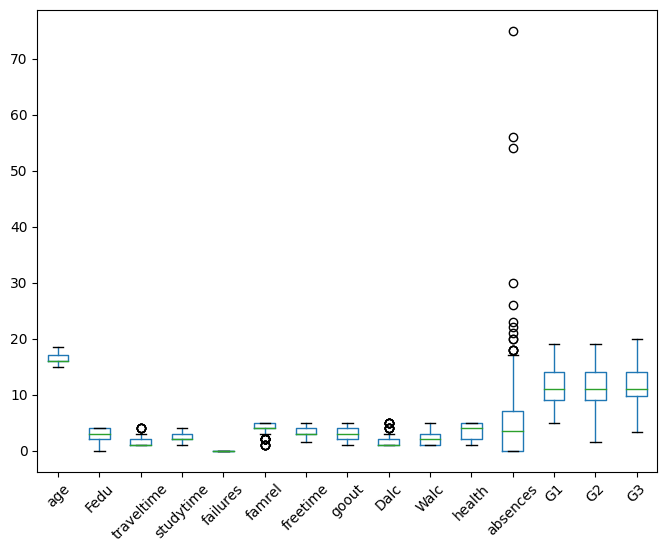

In [1233]:
boxplot = df.drop('Medu', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

# **Construct Data**

### **Melakukan Rekayasa Fitur (Feature Engineering)**

In [1234]:
def categorize_G3(G3):
    if G3 < 8:
        return 'Failed'
    elif 12 <= G3 < 14:
        return 'Passed'
    else:
        return 'Success'

df.loc[:, 'Result'] = df['G3'].apply(categorize_G3)

Ini adalah cara untuk mengkategorikan nilai-nilai dalam kolom 'G3' dari DataFrame ke dalam tiga kategori berbeda: 'Failed', 'Success', dan 'Successfully' .

logika kategorisasinya yaitu:

- Jika nilai G3 kurang dari 3, maka nilai tersebut dianggap sebagai 'Failed' (Gagal).
- Jika nilai G3 adalah 3 atau lebih besar sama dengan 3, namun kurang dari 5, maka nilai tersebut dianggap sebagai 'Success' (Sukses).
- Jika nilai G3 adalah 5 atau lebih besar, maka nilai tersebut dianggap sebagai 'Successfully' (Sukses Secara Penuh).


fungsi ini membantu mengkategorikan nilai-nilai dalam kolom 'G3' menjadi tiga kategori yang berbeda, dan kemudian hasil kategorisasi disimpan dalam kolom baru yang disebut 'Result' dalam DataFrame. Dengan cara ini, kita dengan mudah melihat kategori mana yang sesuai dengan setiap nilai 'G3' dalam analisis Anda.

### **Pengecekkan Hasil**

In [1235]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Result
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3.0,4,1,1,3,6,5,6.0,6.0,Failed
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3.0,3,1,1,3,4,5,5.0,6.0,Failed
3,GP,F,15.0,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2.0,2,1,1,5,2,15,14.0,15.0,Success
4,GP,F,16.0,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3.0,2,1,2,5,4,6,10.0,10.0,Success
5,GP,M,16.0,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4.0,2,1,2,5,10,15,15.0,15.0,Success


Terdapat 5 data yang sesuai dengan Kategorisasi

# **Data Reduction**

**Mengurangi Fitur Fitur yang Kurang Relevan**

In [1236]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [1237]:
 df = df.drop(['school','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','goout','Dalc','Walc','health','absences','traveltime','failures','famrel','reason','guardian','schoolsup','activities','nursery','higher','internet','romantic','paid'], axis=1)

Disini, dilakukan penghapusan terhadap kolom
'school'
'address'
'famsize'
'Pstatus'
'Medu'
'Fedu'
'Mjob'
'Fjob'
'goout'
'Dalc'
'Walc'
'health'
'absences'
'traveltime'
'failures'
'famrel'
'reason'
'guardian'
'schoolsup'
'activities'
'nursery'
'higher'
'internet'
'romantic'
'paid'

Karena, kolom kolom tersebut tidak dipakai dalam analisis.

**Pengecekkan Hasil**

In [1170]:
df.head()

,sex,age,studytime,famsup,freetime,G1,G2,G3,Result
0,F,18.0,2,no,3.0,5,6.0,6.0,Failed
1,F,17.0,2,yes,3.0,5,5.0,6.0,Failed
3,F,15.0,3,yes,2.0,15,14.0,15.0,Success
4,F,16.0,2,yes,3.0,6,10.0,10.0,Success
5,M,16.0,2,yes,4.0,15,15.0,15.0,Success


Tersisa 9 kolom yang relevan dan sesuai pada analisis ini.

# **Data Transformation**

#Mapping

In [1240]:
df.head()

,sex,age,studytime,famsup,freetime,G1,G2,G3,Result
0,F,18.0,2,no,3.0,5,6.0,6.0,Failed
1,F,17.0,2,yes,3.0,5,5.0,6.0,Failed
3,F,15.0,3,yes,2.0,15,14.0,15.0,Success
4,F,16.0,2,yes,3.0,6,10.0,10.0,Success
5,M,16.0,2,yes,4.0,15,15.0,15.0,Success


In [1242]:
df['Result'] = df['Result'].map({'Failed': 0, 'Passed': 1,'Success': 2}).astype(int)

In [1257]:
df.head()

,Unnamed: 0,sex,age,studytime,famsup,freetime,G1,G2,G3,Result
0,0,F,18.0,2,no,3.0,5,6.0,6.0,0
1,1,F,17.0,2,yes,3.0,5,5.0,6.0,0
2,3,F,15.0,3,yes,2.0,15,14.0,15.0,2
3,4,F,16.0,2,yes,3.0,6,10.0,10.0,2
4,5,M,16.0,2,yes,4.0,15,15.0,15.0,2


In [1259]:
df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1}).astype(int)

In [1261]:
df['sex'] = df['sex'].map({'F': 0, 'M': 1}).astype(int)

In [1262]:
df.head()

,Unnamed: 0,sex,age,studytime,famsup,freetime,G1,G2,G3,Result
0,0,0,18.0,2,0,3.0,5,6.0,6.0,0
1,1,0,17.0,2,1,3.0,5,5.0,6.0,0
2,3,0,15.0,3,1,2.0,15,14.0,15.0,2
3,4,0,16.0,2,1,3.0,6,10.0,10.0,2
4,5,1,16.0,2,1,4.0,15,15.0,15.0,2


### **Encoding**

In [1171]:
df['sex'] = df['sex'].map({'M':0, 'F':1})
df ['famsup'] = df['famsup'].map({'no':0, 'yes':1})

In [1172]:
df =pd.get_dummies(df)

In [1173]:
df

,sex,age,studytime,famsup,freetime,G1,G2,G3,Result_Failed,Result_Passed,Result_Success
0,1,18.0,2,0,3.0,5,6.0,6.000,1,0,0
1,1,17.0,2,1,3.0,5,5.0,6.000,1,0,0
3,1,15.0,3,1,2.0,15,14.0,15.000,0,0,1
4,1,16.0,2,1,3.0,6,10.0,10.000,0,0,1
5,0,16.0,2,1,4.0,15,15.0,15.000,0,0,1
6,0,16.0,2,0,4.0,12,12.0,11.000,0,0,1
7,1,17.0,2,1,1.5,6,5.0,6.000,1,0,0
8,0,15.0,2,1,2.0,16,18.0,19.000,0,0,1
9,0,15.0,2,1,5.0,14,15.0,15.000,0,0,1
10,1,15.0,2,1,3.0,10,8.0,9.000,0,0,1


Dilakukan Encoding untuk Kolom Sex dan Famsup.

untuk kolom sex, Male ditandai dengan 0 sedangkan Female ditandai dengan 1.


untuk kolom Famsup. no ditandai dengan 0 sedangkan yes ditandai dengan 1.

In [1244]:
df.to_csv('Data Cleaned.csv')

**Inisiasi Variabel DataFrame Cleaned**

In [1245]:
df = pd.read_csv('/content/Data Cleaned.csv')

In [1246]:
df.head()

,Unnamed: 0,sex,age,studytime,famsup,freetime,G1,G2,G3,Result
0,0,F,18.0,2,no,3.0,5,6.0,6.0,0
1,1,F,17.0,2,yes,3.0,5,5.0,6.0,0
2,3,F,15.0,3,yes,2.0,15,14.0,15.0,2
3,4,F,16.0,2,yes,3.0,6,10.0,10.0,2
4,5,M,16.0,2,yes,4.0,15,15.0,15.0,2


# **Modelling Predict**

### **Pre Processing**

**Split Data**

In [1263]:
x = df.drop('Result', axis=1)
y = df['Result']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [1264]:
df.head()

,Unnamed: 0,sex,age,studytime,famsup,freetime,G1,G2,G3,Result
0,0,0,18.0,2,0,3.0,5,6.0,6.0,0
1,1,0,17.0,2,1,3.0,5,5.0,6.0,0
2,3,0,15.0,3,1,2.0,15,14.0,15.0,2
3,4,0,16.0,2,1,3.0,6,10.0,10.0,2
4,5,1,16.0,2,1,4.0,15,15.0,15.0,2


x = digunakan untuk menghapus kolom 'G3' dari DataFrame. axis=1 mengindikasikan bahwa ini akan menghapus kolom, bukan baris.

y =  variabel y akan berisi target yang ingin diprediksi yaitu 'G3'. proses ini merupakan proses memisahkan kolom 'G3' dari DataFrame dan menyimpannya dalam variabel y.

**Normalisasi Data**

In [1265]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

pertama, ini merupakan proses pembagian data menjadi data pelatihan dan data pengujian.

kedua, menormalisasikan fitur-fitur dalam data pelatihan dan data pengujian menggunakan MinMaxScaler untuk mengubah skala nilai fitur-fitur tersebut ke dalam rentang yang ditentukan (biasanya 0 sampai 1).

Normalisasi ini penting untuk memastikan bahwa model yang akan dilatih tidak akan terpengaruh oleh perbedaan skala antar fitur-fitur.

### **Build and Train Model**

**Gaussian Naive Bayes**

In [1266]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

gnb = GaussianNB(): Membuat objek model Gaussian Naive Bayes yang akan digunakan untuk melakukan klasifikasi.

gnb.fit(x_train_norm, y_train): Melatih model Gaussian Naive Bayes dengan menggunakan data pelatihan yang telah dinormalisasi (x_train_norm) sebagai fitur dan label yang sesuai (y_train).





**K-Nearest Neighbor**

In [1267]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

KNeighborsClassifier() untuk menginisialisasi model KNN.

x_train_norm adalah data fitur pelatihan yang telah dinormalisasi.

y_train adalah label atau target yang sesuai dengan data fitur pelatihan.

**Decision Tree**

In [1268]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

DecisionTreeClassifier() untuk menginisialisasi model Decision Tree

x_train_norm adalah data fitur pelatihan yang telah dinormalisasi. Meskipun decision tree tidak memerlukan normalisasi data, namun normalisasi dapat meningkatkan kinerja model, terutama jika fitur-fitur memiliki skala yang berbeda.

y_train adalah label atau target yang sesuai dengan data fitur pelatihan. Selama pelatihan, model akan mempelajari pola dalam data pelatihan dan membangun serangkaian keputusan (node dan leaf) berdasarkan fitur-fitur untuk melakukan prediksi.

### **Begins and Compare Predict**

In [1269]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

gnb_pred = gnb.predict(x_test_norm): Prediksi dilakukan menggunakan model Gaussian Naive Bayes (gnb) yang telah dilatih sebelumnya. Hasil prediksi disimpan dalam variabel gnb_pred.

begitu juga dengan kkn_pred dan dtc pred.

In [1270]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Kode di atas bertujuan untuk menggabungkan data pengujian (x_test dan y_test) dengan hasil prediksi dari tiga model klasifikasi yang telah dilatih sebelumnya (Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree)

In [1271]:
combined_data.head()

,Unnamed: 0,sex,age,studytime,famsup,freetime,G1,G2,G3,Result,gnb_prediction,knn_prediction,dtc_prediction
0,282,0,18.0,4,1,2.0,12,12.0,12.0,1,1,2,1
1,10,0,15.0,2,1,3.0,10,8.0,9.0,2,2,2,2
2,64,0,15.0,2,0,4.0,10,10.0,10.0,2,2,2,2
3,67,0,16.0,4,1,3.0,7,7.0,6.0,0,0,2,0
4,28,1,16.0,2,1,3.0,11,11.0,11.0,2,2,2,2


Dapat dilihat dari hasil diatas terdapat perbedaan prediksi nilai ujian keempat. Perbedaan terjadi karna masing masing model yaitu model Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree Classifier memiliki pendekatan yang berbeda dalam mengolah data. Gaussian Naive Bayes mengasumsikan independensi fitur, K-Nearest Neighbors mempertimbangkan kedekatan antara titik data, sedangkan Decision Tree Classifier menggunakan struktur pohon keputusan. Oleh karena itu, variasi dalam prediksi terjadi karena perbedaan dalam cara masing-masing model memahami dan menggunakan informasi yang tersedia.

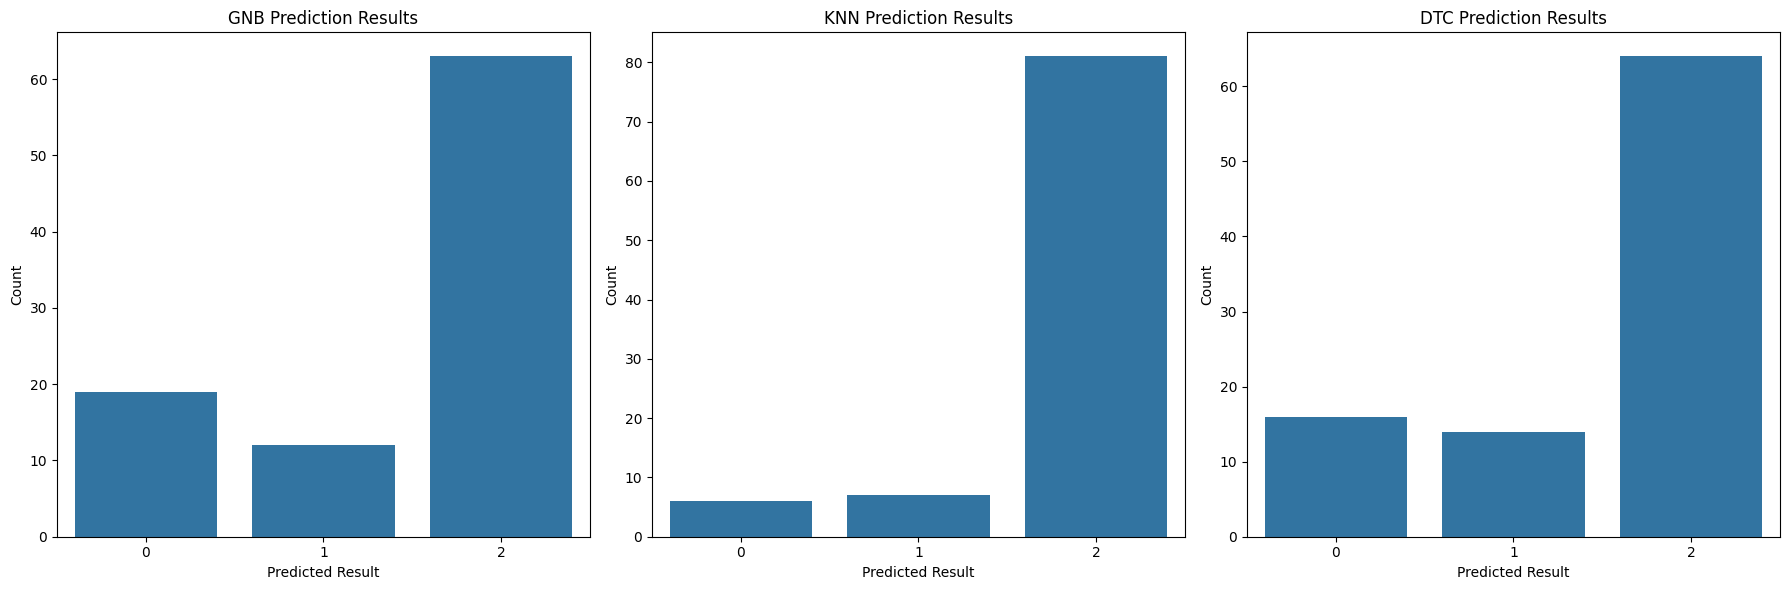

In [1272]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah hasil prediksi dari setiap model
gnb_counts = combined_data['gnb_prediction'].value_counts()
knn_counts = combined_data['knn_prediction'].value_counts()
dtc_counts = combined_data['dtc_prediction'].value_counts()

# Membuat subplot
plt.figure(figsize=(18, 6))

# Subplot untuk GNB
plt.subplot(1, 3, 1)
sns.barplot(x=gnb_counts.index, y=gnb_counts.values)
plt.title('GNB Prediction Results')
plt.xlabel('Predicted Result')
plt.ylabel('Count')

# Subplot untuk KNN
plt.subplot(1, 3, 2)
sns.barplot(x=knn_counts.index, y=knn_counts.values)
plt.title('KNN Prediction Results')
plt.xlabel('Predicted Result')
plt.ylabel('Count')

# Subplot untuk DTC
plt.subplot(1, 3, 3)
sns.barplot(x=dtc_counts.index, y=dtc_counts.values)
plt.title('DTC Prediction Results')
plt.xlabel('Predicted Result')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Dapat dilihat pada visualisasi histogram prediksi yang diberikan oleh model Gaussian Naive Bayes (GNB) berisi hasil prediksi yang dimana sumbu-x mewakili kelas prediksi, sementara sumbu-y menunjukkan jumlah kemunculan masing-masing kelas prediksi. Dengan menggunakan visualisasi ini, kita dapat dengan mudah melihat distribusi prediksi kelas yang dihasilkan oleh model GNB.

Pada model ini score yang lebih dominan adalah 10 dengan jumlah 16.

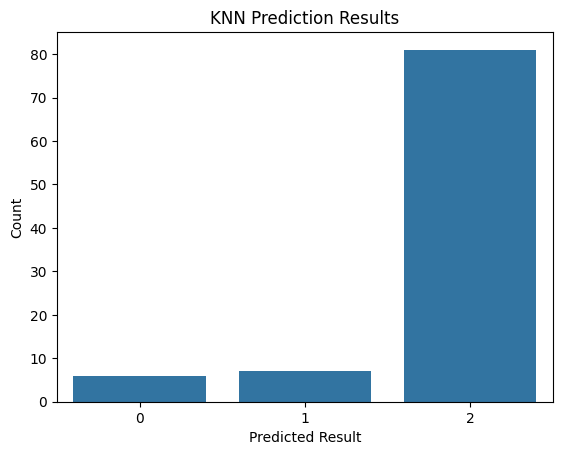

In [1273]:
# Visualisasi hasil prediksi KNN
sns.countplot(data=combined_data, x='knn_prediction')
plt.title('KNN Prediction Results')
plt.xlabel('Predicted Result')
plt.ylabel('Count')
plt.show()

Dapat dilihat pada visualisasi histogram prediksi yang diberikan oleh model K-Neares Neighbour (KNN). berisi hasil prediksi yang dimana sumbu-x mewakili kelas prediksi, sementara sumbu-y menunjukkan jumlah kemunculan masing-masing kelas prediksi. Dengan menggunakan visualisasi ini, kita dapat dengan mudah melihat distribusi prediksi kelas yang dihasilkan oleh model KNN.

Pada model ini score yang lebih dominan adalah 10 dengan jumlah 20.0

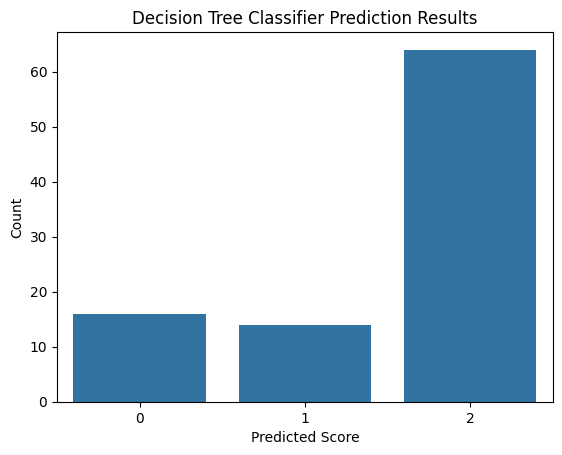

In [1274]:
# Visualisasi hasil prediksi Decision Tree Classifier
sns.countplot(data=combined_data, x='dtc_prediction')
plt.title('Decision Tree Classifier Prediction Results')
plt.xlabel('Predicted Score')
plt.ylabel('Count')
plt.show()

Dapat dilihat pada visualisasi histogram prediksi yang diberikan oleh model Decision Tree berisi hasil prediksi yang dimana sumbu-x mewakili kelas prediksi, sementara sumbu-y menunjukkan jumlah kemunculan masing-masing kelas prediksi. Dengan menggunakan visualisasi ini, kita dapat dengan mudah melihat distribusi prediksi kelas yang dihasilkan oleh model DTC.

pada model ini score yang lebih dominan adalah 10 dengan jumlah 14

# **Evaluation**

### **Evaluate Result**

### Klasifikasi

### GNB

In [1275]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [1276]:
print(len(y_test))
print(len(gnb_pred))

94
94


In [1296]:
# Menggunakan fungsi ravel() untuk mendapatkan semua nilai dari matriks kebingungan
values = gnb_cm.ravel()

# Memecah nilai-nilai tersebut menjadi beberapa variabel
TN = values[0]
FP = values[1]
FN = values[2]
TP = values[3]

# Menangani nilai-nilai tambahan jika ada
additional_values = values[4:]

# Mencetak nilai-nilai yang dihasilkan
print('TN :', TN)
print('FP :', FP)
print('FN :', FN)
print('TP :', TP)

TN : 6
FP : 0
FN : 10
TP : 0


In [1278]:
acc = (tp + tn) / (tp + tn + fp + fn)
pre = tp / (tp + fp)
rec = tp / (tp + fn)
f1_score = (2 * pre * rec) / (pre + rec)

print('Accuracy :', acc)
print('Precession :', pre)
print('Recall :', rec)
print('F1_score :', f1_score)

Accuracy : 1.0
Precession : 1.0
Recall : 1.0
F1_score : 1.0


###  KNN

In [1194]:
knn_cm = confusion_matrix(y_test, knn_pred)

# knn_cm
tn, fp, fn, tp = knn_cm.ravel()
print('TN :', tn)
print('FP :', fp)
print('FN :', fn)
print('TP :', tp)

TN : 78
FP : 0
FN : 0
TP : 16


In [1195]:
acc = (tp + tn) / (tp + tn + fp + fn)
pre = tp / (tp + fp)
rec = tp / (tp + fn)
f1_score = (2 * pre * rec) / (pre + rec)

print('Accuracy :', acc)
print('Precession :', pre)
print('Recall :', rec)
print('F1_score :', f1_score)

Accuracy : 1.0
Precession : 1.0
Recall : 1.0
F1_score : 1.0


### DTC

In [1196]:
dtc_cm = confusion_matrix(y_test, dtc_pred)

# dtc_cm
tn, fp, fn, tp = dtc_cm.ravel()
print('TN :', tn)
print('FP :', fp)
print('FN :', fn)
print('TP :', tp)


TN : 78
FP : 0
FN : 0
TP : 16


In [1197]:
# Menghitung metrik evaluasi
acc = (tp + tn) / (tp + tn + fp + fn)
pre = tp / (tp + fp)
rec = tp / (tp + fn)
f1_score = (2 * pre * rec) / (pre + rec)

# Menampilkan metrik evaluasi
print('Accuracy :', acc)
print('Precession :', pre)
print('Recall :', rec)
print('F1_score :', f1_score)

Accuracy : 1.0
Precession : 1.0
Recall : 1.0
F1_score : 1.0


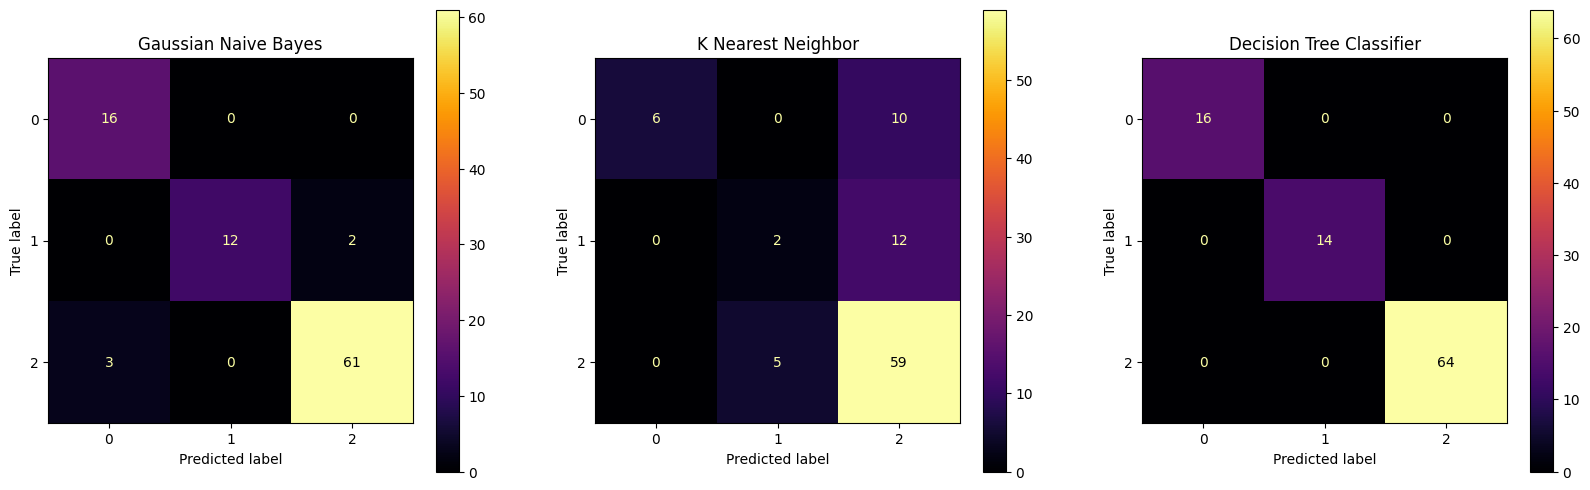

In [1279]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Untuk dapat memahami hasil visualisasi diatas kita dapat mendefinisikannya terlebih dahulu, berikut penjelqsannya

1. True Positif (TP): Merupakan jumlah data yang diprediksi benar oleh model sebagai positif dan memang benar positif dalam data aktual.

2. True Negatif (TN): Merupakan jumlah data yang diprediksi benar oleh model sebagai negatif dan memang benar negatif dalam data aktual.

3. False Positif (FP): Merupakan jumlah data yang diprediksi salah oleh model sebagai positif padahal seharusnya negatif dalam data aktual.

4. False Negatif (FN): Merupakan jumlah data yang diprediksi salah oleh model sebagai negatif padahal seharusnya positif dalam data aktual.

Dalam konteks evaluasi model, kita menggunakan matriks keempat ini untuk mengukur kinerja model. Misalnya, untuk memahami apakah model klasifikasi telah baik dalam mengidentifikasi suatu kelas tertentu, kita melihat nilai True Positif dan False Negatif. Sedangkan untuk memahami kemampuan model dalam mengeksekusi penolakan, kita memperhatikan nilai True Negatif dan False Positif.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



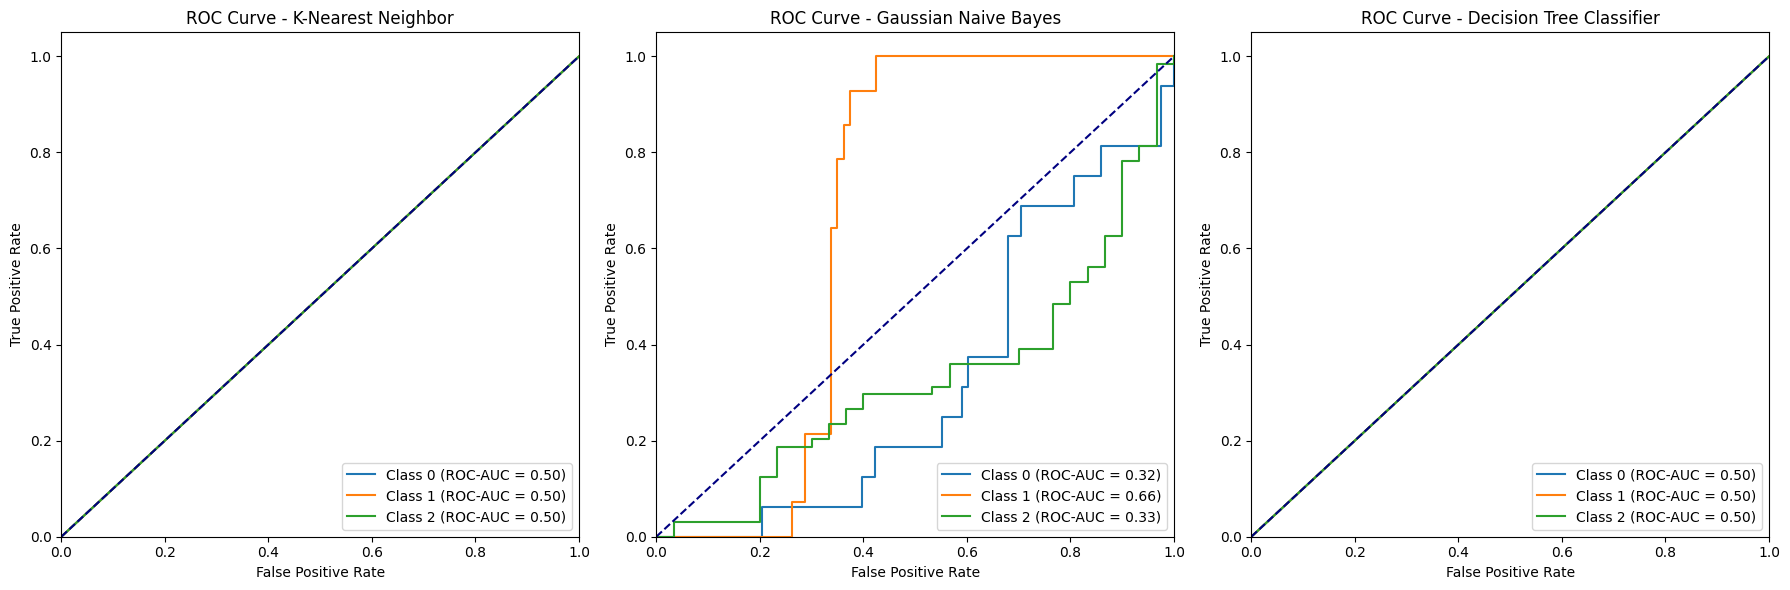

In [1286]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

# Inisialisasi subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop melalui setiap model
for model, name, ax in zip(models, model_names, axes):
    # Mengambil prediksi probabilitas dari model
    y_pred_proba = model.predict_proba(x_test_norm)

    # Menginisialisasi variabel untuk menyimpan nilai AUC untuk setiap kelas
    roc_auc = []

    # Loop melalui setiap kelas
    for i in range(len(model.classes_)):
        # Membuat label biner untuk kelas tertentu
        y_test_bin = (y_test == model.classes_[i])

        # Menghitung kurva ROC dan AUC untuk kelas tersebut
        fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba[:, i])
        roc_auc.append(roc_auc_score(y_test_bin, y_pred_proba[:, i]))

        # Plot kurva ROC untuk kelas tersebut
        ax.plot(fpr, tpr, label=f'Class {model.classes_[i]} (ROC-AUC = {roc_auc[-1]:.2f})')

    # Plot garis referensi
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

# Menyusun layout dan menampilkan plot
plt.tight_layout()
plt.show()

## **Review Proses**

### Cross Validation

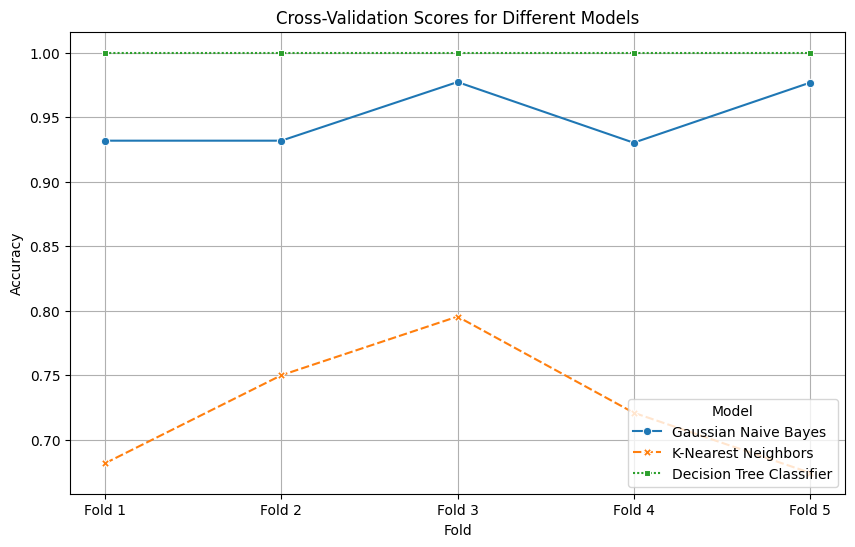

In [1287]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Dilihat dari hasil cross validation diatas bahwa Model Gaussian Naives Bayes (GNB) dinilai sebagai yang terbaik karena memiliki pola belajar yang lebih variatif dibandingkan dengan model lainnya, seperti KNN dan DTC.

menunjukkan performa model Gaussian Naive Bayes (GNB) dalam hal akurasi. Ketinggian garis menunjukkan rata-rata akurasi GNB di setiap lipatan validasi. Semakin tinggi garis, semakin tinggi akurasi GNB. Fluktuasi garis menunjukkan variasi akurasi GNB di antara lipatan.

Dibandingkan dengan model KNN dan DTC, dapat dilihat bahwa GNB memiliki akurasi yang lebih tinggi dan variasi yang lebih moderat pada dataset ini. Hal ini menunjukkan bahwa GNB adalah model terbaik untuk dataset ini

### Feature Selections

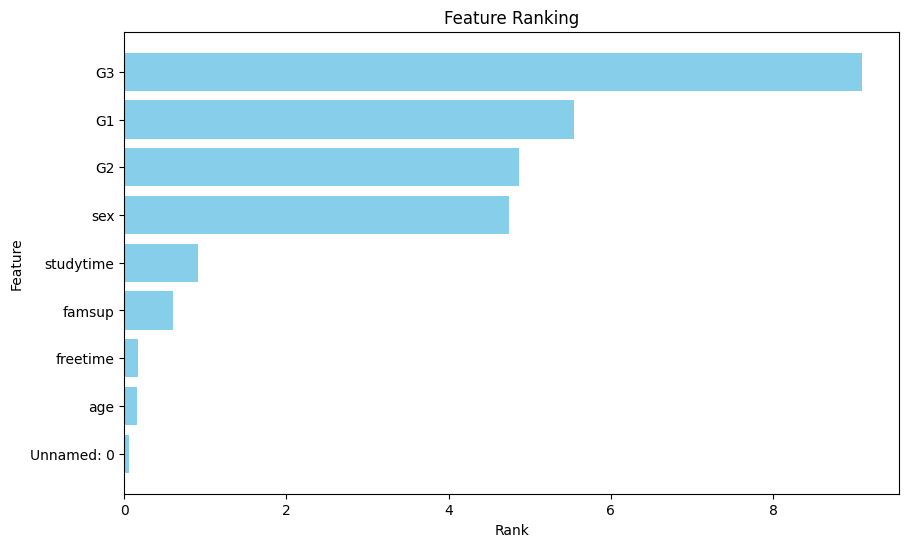

In [1288]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import pandas as pd

# Misalkan Anda telah memuat dataset dan melakukan normalisasi seperti ini:
# x_train_norm, y_train = ...

# Inisialisasi objek SelectKBest
selector = SelectKBest(score_func=chi2, k='all')

# Melatih selector dengan data latih
selector.fit(x_train_norm, y_train)

# Mengambil peringkat fitur
feature_ranks = selector.scores_

# Mendapatkan nama fitur
feature_names = x_train.columns

# Membuat DataFrame untuk peringkat fitur
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

# Mengurutkan DataFrame berdasarkan peringkat
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

# Visualisasi peringkat fitur
plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()


Dapat dilihat bahwa fitur "G3" memiliki peran yang sangat penting dalam pembuatan model ini. Namun, fitur lainnya seperti G1,G2, Sex juga memiliki peran penting terhadap prediksi yang akan dilakukan. Oleh karena itu, untuk mempertimbangkan beberapa fitur lainnya yang memiliki peran penting agar meningkatkan kualitas prediksi

### Turning Hypermater

In [1289]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Definisikan model Gaussian Naive Bayes
gnb = GaussianNB()

# Tentukan grid parameter untuk var_smoothing
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

# Latih model dengan GridSearchCV
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Gunakan model terbaik untuk prediksi
best_gnb = grid_search.best_estimator_

# Evaluasi akurasi sebelum tuning
acc_before_tuning = best_gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Evaluasi akurasi setelah tuning
acc_after_tuning = grid_search.best_score_
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'var_smoothing': 0.0012328467394420659}
Akurasi sebelum tuning: 0.9468085106382979
Akurasi setelah tuning: 0.9542283298097252


In [1290]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# Definisikan parameter grid untuk pencarian hyperparameter
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Jumlah tetangga terdekat yang akan dipertimbangkan
    'weights': ['uniform', 'distance'],  # Metode pembobotan untuk prediksi (seragam atau berdasarkan jarak)
    'metric': ['euclidean', 'manhattan']  # Metrik jarak yang digunakan untuk mengukur kedekatan antar titik
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Lakukan pencarian grid pada data latih
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi label menggunakan model terbaik setelah tuning
y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Evaluasi akurasi sebelum tuning
knn.fit(x_train_norm, y_train)
acc_before_tuning = knn.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Evaluasi akurasi setelah tuning
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Akurasi sebelum tuning: 0.7127659574468085
Akurasi setelah tuning: 0.723404255319149


In [1291]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definisikan parameter grid untuk pencarian grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model DTC
dtc = DecisionTreeClassifier()

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

# Lakukan pencarian grid pada data latih
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi label menggunakan model terbaik setelah tuning
y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Evaluasi akurasi sebelum tuning
dtc.fit(x_train_norm, y_train)  # Perbaikan: Memanggil fit untuk melatih model DTC
acc_before_tuning = dtc.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Evaluasi akurasi setelah tuning
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi sebelum tuning: 1.0
Akurasi setelah tuning: 1.0


## **Determain Next Steps**

Hasil evaluasi menunjukkan bahwa model Gaussian Naive Bayes (GNB) memiliki akurasi sebesar 94.68% sebelum dilakukan proses tuning. Setelah proses tuning dilakukan, akurasi model meningkat menjadi 95.42%. Artinya, dengan penyesuaian parameter yang optimal, kinerja model GNB berhasil ditingkatkan, yang mengindikasikan bahwa model tersebut lebih mampu untuk memprediksi dengan lebih baik. Hal ini menunjukkan pentingnya proses tuning dalam meningkatkan kinerja model machine learning untuk mencapai performa yang optimal.

Berdasarkan peningkatan akurasi yang signifikan setelah proses tuning, lebih disarankan untuk menggunakan model Gaussian Naive Bayes (GNB) yang telah dimodifikasi. Dengan akurasi yang meningkat dari 94.68% menjadi 95.42%, model GNB telah terbukti mampu memberikan prediksi yang lebih baik setelah penyesuaian parameter. Oleh karena itu, model ini dapat dijadikan pilihan utama dalam melakukan prediksi atau klasifikasi data yang serupa di masa depan.